In [43]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("mimic_cut_3d.csv", index_col = 0)
df.head()

,stay_id,creatinine,fraction_inspired_oxygen,lactate,urine_output,diastolic_blood_pressure,systolic_blood_pressure,gcs,partial_pressure_of_oxygen,heart_rate,temperature,respiratory_rate
30,33751102.0,1.150000,0.880000,6.14,280.000000,57.058333,111.058333,15.0,98.562500,112.104167,36.303175,25.824811
31,33751102.0,1.150000,0.833333,6.65,257.142857,56.162963,109.051852,15.0,97.714286,110.759259,36.465278,22.955387
32,33751102.0,1.150000,0.833333,7.50,232.500000,55.746667,107.546667,15.0,103.166667,109.683333,36.558025,23.659848
33,33751102.0,1.166667,0.833333,8.20,232.500000,55.587879,106.951515,15.0,103.166667,108.712121,36.558025,24.236226
34,33751102.0,1.166667,0.800000,8.20,231.666667,55.538889,107.288889,15.0,103.166667,107.486111,36.572222,24.716540


In [45]:
df.isnull().sum()

stay_id                       0
creatinine                    0
fraction_inspired_oxygen      0
lactate                       0
urine_output                  0
diastolic_blood_pressure      0
systolic_blood_pressure       0
gcs                           0
partial_pressure_of_oxygen    0
heart_rate                    0
temperature                   0
respiratory_rate              0
dtype: int64

<AxesSubplot:>

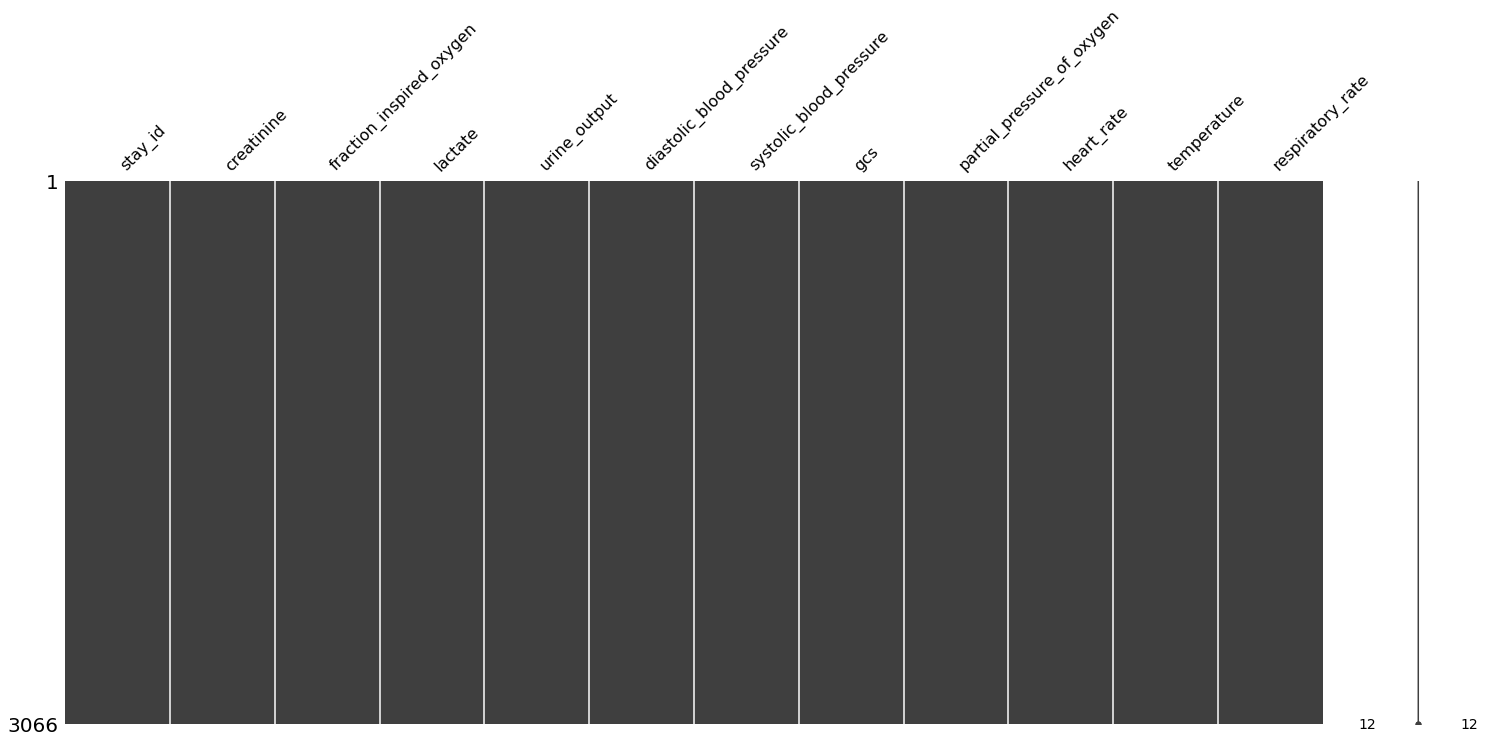

In [46]:
msno.matrix(df)

/Users/shangwang/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/shangwang/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

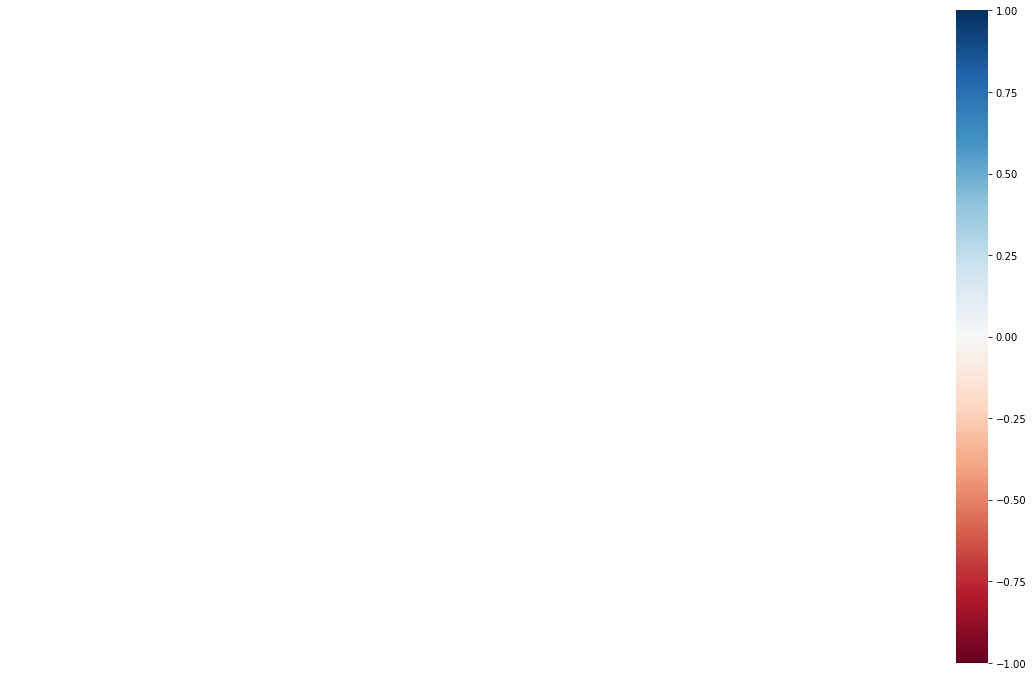

In [47]:
msno.heatmap(df)

In [48]:
def mask_random_data(data, mask_fraction=0.1):
    """
    Randomly masks a given fraction of the data in a DataFrame.

    :param data: Pandas DataFrame to be masked.
    :param mask_fraction: Fraction of the data to be masked. Default is 0.1 (10%).
    :return: DataFrame with masked data.
    """
    # Flatten the DataFrame to work with individual elements
    flattened_data = data.to_numpy().flatten()

    # Calculate the number of elements to mask
    num_to_mask = int(len(flattened_data) * mask_fraction)

    # Randomly select indices to mask
    mask_indices = np.random.choice(len(flattened_data), num_to_mask, replace=False)

    # Mask the selected indices
    for idx in mask_indices:
        flattened_data[idx] = np.nan

    # Reshape the data back to its original shape and create a new DataFrame
    return pd.DataFrame(flattened_data.reshape(data.shape), columns=data.columns)

masked_df = mask_random_data(df)

In [49]:
masked_df.head()

,stay_id,creatinine,fraction_inspired_oxygen,lactate,urine_output,diastolic_blood_pressure,systolic_blood_pressure,gcs,partial_pressure_of_oxygen,heart_rate,temperature,respiratory_rate
0,33751102.0,NaN,0.880000,NaN,280.000000,57.058333,111.058333,15.0,98.562500,112.104167,36.303175,25.824811
1,33751102.0,1.150000,0.833333,6.65,257.142857,56.162963,NaN,15.0,97.714286,110.759259,36.465278,22.955387
2,33751102.0,1.150000,0.833333,7.50,232.500000,55.746667,107.546667,15.0,103.166667,109.683333,36.558025,23.659848
3,NaN,1.166667,0.833333,8.20,232.500000,55.587879,106.951515,15.0,103.166667,108.712121,36.558025,NaN
4,33751102.0,1.166667,0.800000,8.20,231.666667,NaN,107.288889,15.0,103.166667,107.486111,36.572222,24.716540


In [50]:
masked_df.isnull().sum()

stay_id                       323
creatinine                    308
fraction_inspired_oxygen      295
lactate                       319
urine_output                  303
diastolic_blood_pressure      343
systolic_blood_pressure       290
gcs                           294
partial_pressure_of_oxygen    283
heart_rate                    299
temperature                   297
respiratory_rate              325
dtype: int64

<AxesSubplot:>

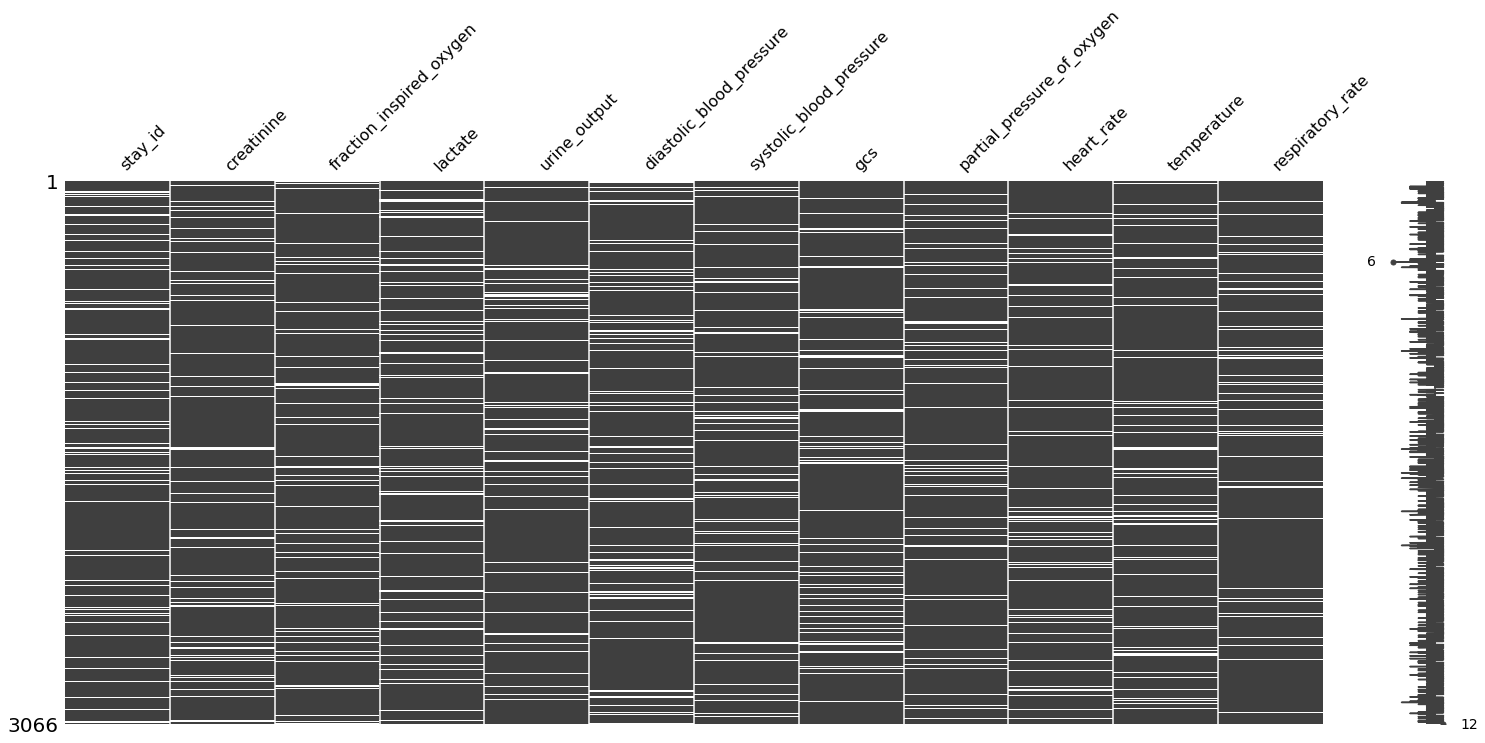

In [51]:
msno.matrix(masked_df)

<AxesSubplot:>

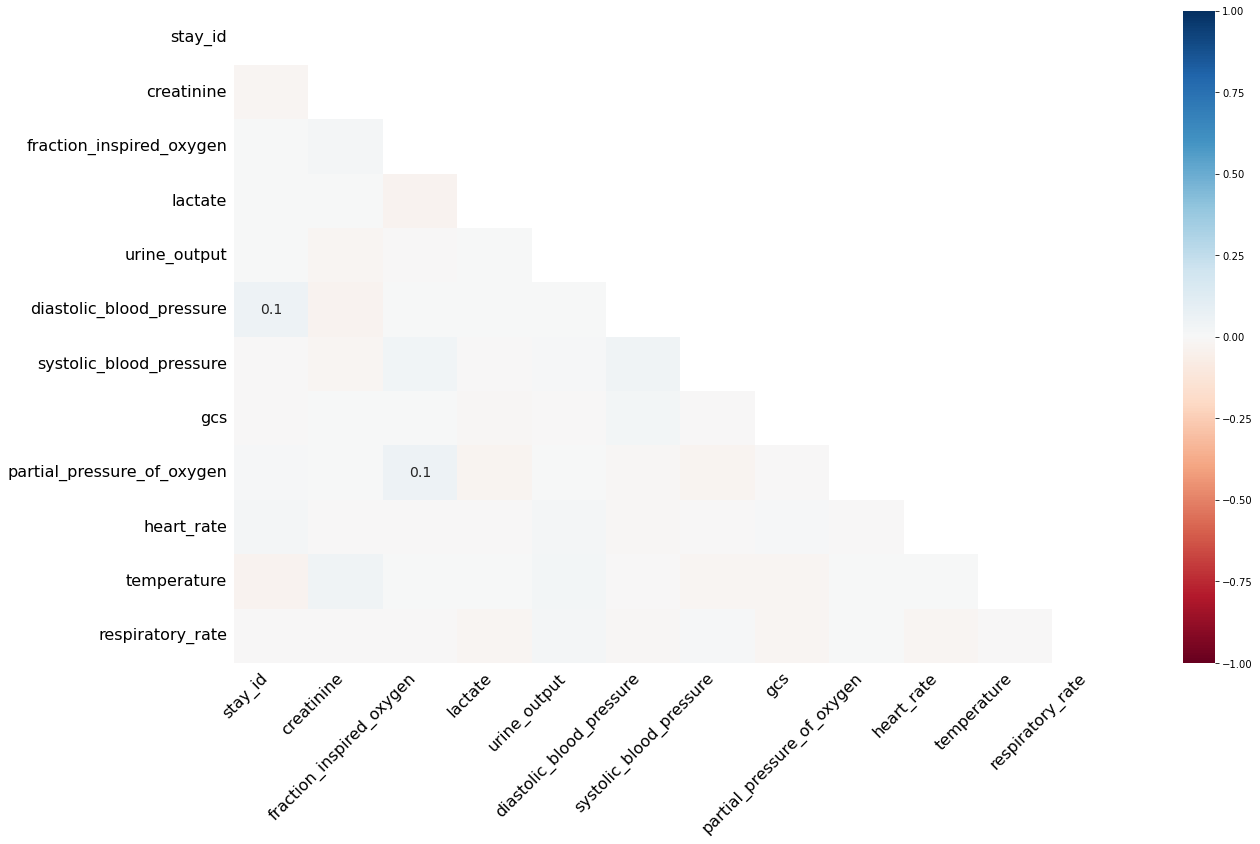

In [52]:
msno.heatmap(masked_df)

In [53]:
masked_df.to_csv('hi', index=False)

In [59]:
file_path = 'hi'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,stay_id,creatinine,fraction_inspired_oxygen,lactate,urine_output,diastolic_blood_pressure,systolic_blood_pressure,gcs,partial_pressure_of_oxygen,heart_rate,temperature,respiratory_rate
0,33751102.0,1.150000,0.880000,6.14,280.000000,57.058333,111.058333,15.0,NaN,112.104167,36.303175,25.824811
1,33751102.0,1.150000,0.833333,6.65,257.142857,56.162963,109.051852,15.0,97.714286,110.759259,36.465278,22.955387
2,33751102.0,1.150000,0.833333,7.50,NaN,NaN,107.546667,15.0,103.166667,109.683333,36.558025,23.659848
3,33751102.0,1.166667,NaN,8.20,232.500000,55.587879,106.951515,NaN,103.166667,108.712121,36.558025,24.236226
4,33751102.0,1.166667,0.800000,8.20,231.666667,55.538889,107.288889,15.0,103.166667,107.486111,36.572222,24.716540


In [60]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD

# Handling missing values by mean imputation
imputer = SimpleImputer(strategy='mean')
data_imputed = data.copy()
data_imputed.iloc[:, 1:] = imputer.fit_transform(data.iloc[:, 1:])

# SVD along the 'patient' dimension
svd_patient_results = {}

# Iterate over each patient
for stay_id, group in data_imputed.groupby('stay_id'):
    # Perform SVD on the group (excluding the 'stay_id' column)
    svd = TruncatedSVD(n_components=min(group.shape) - 1)
    svd.fit(group.iloc[:, 1:])
    svd_patient_results[stay_id] = {
        'explained_variance_ratio': svd.explained_variance_ratio_,
        'singular_values': svd.singular_values_
    }

# Display results for the first patient as an example
first_stay_id = list(svd_patient_results.keys())[0]
svd_patient_results[first_stay_id]


{'explained_variance_ratio': array([0.39835237, 0.50625301, 0.07828131]),
 'singular_values': array([435.61162681,  23.88526401,   9.38603658])}

Explained Variance Ratio represents the proportion of the dataset's variance that is captured by each singular value. For the first patient, the values are approximately 39.8%, 50.6%, and 7.8% for the first three components, respectively. For the first patient, the singular values are approximately 435.61, 23.89, and 9.39, respectively.

These results indicate how much of the variance in the patient's data is explained by each component of the SVD. The singular values and the explained variance ratio provide insights into the underlying structure of the data for each patient.

In [61]:
def svd_imputation(matrix, k=5, max_iter=100, tol=1e-4):
    # Replace NaN values with mean
    matrix = np.nan_to_num(matrix, nan=np.nanmean(matrix))

    for _ in range(max_iter):
        # Perform SVD
        U, S, Vt = np.linalg.svd(matrix, full_matrices=False)

        # Truncate to the top k singular values
        U_k = U[:, :k]
        S_k = np.diag(S[:k])
        Vt_k = Vt[:k, :]

        # Reconstruct matrix with the low-rank approximation
        matrix_approx = np.dot(U_k, np.dot(S_k, Vt_k))

        # Update missing values in the original matrix with the imputed values
        matrix[np.isnan(matrix)] = matrix_approx[np.isnan(matrix)]

        # Check for convergence
        if np.linalg.norm(matrix_approx - matrix) < tol:
            break

    return matrix

# Sample data
imputed_df = svd_imputation(masked_df)

In [62]:
# SVD along the 'time' dimension
# As the dataset doesn't have a distinct timestamp column, we'll treat each row as a unique time point.

# Perform SVD on the transposed matrix (excluding the 'stay_id' column)
svd_time = TruncatedSVD(n_components=min(data_imputed.shape) - 1)
svd_time.fit(data_imputed.iloc[:, 1:].T)

# Results
svd_time_results = {
    'explained_variance_ratio': svd_time.explained_variance_ratio_,
    'singular_values': svd_time.singular_values_
}

svd_time_results

{'explained_variance_ratio': array([7.63326924e-01, 1.64246799e-01, 6.11039507e-02, 8.29744926e-03,
        1.86641334e-03, 5.47922098e-04, 3.01784657e-04, 2.15863627e-04,
        5.54435183e-05, 3.67363736e-05, 7.13103216e-07]),
 'singular_values': array([1.25946418e+04, 3.93474442e+03, 2.44697972e+03, 8.84425043e+02,
        4.22525364e+02, 2.40962407e+02, 1.69529372e+02, 1.50250323e+02,
        7.49071017e+01, 5.95562507e+01, 8.58249795e+00])}

Explained variance ratio of 76.33%, 16.42%, 6.11%, etc., for the first few components. This indicates that the first component explains a significant portion of the variance in the data across all time points. Singular Values of 12594.64, 3934.74, 2446.98, etc., for the first few components.

These results provide insight into how much of the variance in the entire dataset, across all patients and measurements, is explained by each component of the SVD. The high explained variance by the first component suggests that there might be a strong underlying pattern or factor that is consistent across the majority of the dataset.

In [63]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler instance for normalization
scaler = StandardScaler()

# Applying normalization (mean=0, std=1) to the data (excluding the 'stay_id' column)
data_normalized = data_imputed.copy()
data_normalized.iloc[:, 1:] = scaler.fit_transform(data_imputed.iloc[:, 1:])

# Reapplying SVD along the 'patient' dimension after normalization
svd_patient_normalized_results = {}

# Iterate over each patient
for stay_id, group in data_normalized.groupby('stay_id'):
    # Perform SVD on the group (excluding the 'stay_id' column)
    svd = TruncatedSVD(n_components=min(group.shape) - 1)
    svd.fit(group.iloc[:, 1:])
    svd_patient_normalized_results[stay_id] = {
        'explained_variance_ratio': svd.explained_variance_ratio_,
        'singular_values': svd.singular_values_
    }

# Reapplying SVD along the 'time' dimension after normalization
# Perform SVD on the transposed matrix (excluding the 'stay_id' column)
svd_time_normalized = TruncatedSVD(n_components=min(data_normalized.shape) - 1)
svd_time_normalized.fit(data_normalized.iloc[:, 1:].T)

# Results for the time dimension
svd_time_normalized_results = {
    'explained_variance_ratio': svd_time_normalized.explained_variance_ratio_,
    'singular_values': svd_time_normalized.singular_values_
}

# Display results for the first patient and time dimension as examples
first_stay_id_normalized = list(svd_patient_normalized_results.keys())[0]
first_patient_normalized_results = svd_patient_normalized_results[first_stay_id_normalized]
time_dimension_normalized_results = svd_time_normalized_results

first_patient_normalized_results, time_dimension_normalized_results



({'explained_variance_ratio': array([0.39687528, 0.42385743, 0.13333691]),
  'singular_values': array([8.16880049, 2.36855387, 1.30834125])},
 {'explained_variance_ratio': array([0.1609392 , 0.13009459, 0.10754931, 0.11489257, 0.09276264,
         0.08074328, 0.08144297, 0.06586348, 0.06361313, 0.05970601,
         0.04239283]),
  'singular_values': array([78.12821651, 65.07058829, 64.03252686, 58.88171325, 54.92271118,
         52.02311201, 50.36777846, 47.7642354 , 46.31973731, 42.5277793 ,
         36.40337785])})

Results slightly different after we normalize

In [64]:
from sklearn.decomposition import PCA

# Applying PCA to the normalized data
pca = PCA(n_components=min(data_normalized.shape[1]-1, data_normalized.shape[0]))
pca.fit(data_normalized.iloc[:, 1:])

# Results of PCA
pca_results = {
    'explained_variance_ratio': pca.explained_variance_ratio_,
    'components': pca.components_,
    'singular_values': pca.singular_values_
}

# Displaying the explained variance ratio and the first few components
pca_results['explained_variance_ratio'], pca_results['components'][:3]


(array([0.1809885 , 0.12554651, 0.12157281, 0.10280069, 0.08944151,
        0.08024682, 0.07522129, 0.0676458 , 0.06361614, 0.05362664,
        0.0392933 ]),
 array([[-0.22956647, -0.3859158 , -0.17962912,  0.19436941, -0.09886579,
          0.06118495,  0.04324086,  0.35547247, -0.49783524, -0.24517764,
         -0.52784624],
        [-0.52254979,  0.14952062, -0.30350904,  0.55842602,  0.3598767 ,
          0.07223341,  0.03447455,  0.00671798,  0.24688637,  0.32196338,
         -0.00721904],
        [ 0.03463018,  0.22235936,  0.49534233,  0.16286342,  0.48324478,
          0.14434531,  0.00789941,  0.36445813,  0.10932384, -0.52678159,
          0.0276547 ]]))

* First Component: contributions from features like fraction_inspired_oxygen, partial_pressure_of_oxygen, heart_rate, and respiratory_rate.
* Second Component: contributions from creatinine, lactate, urine_output, systolic_blood_pressure, and heart_rate.
* Third Component: contributions from lactate, urine_output, diastolic_blood_pressure, and systolic_blood_pressure.

We'll compare the explained variance ratios and the principal components/singular values from both the original and imputed datasets. This comparison will help us understand how imputation might have affected the underlying structure and variance in the data.